In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import math
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import precision_recall_curve, auc, accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
import warnings


warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv(r'C:/Internship Project/alzheimer.csv')

In [7]:
data.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   373 non-null    object 
 1   M/F     373 non-null    object 
 2   Age     373 non-null    int64  
 3   EDUC    373 non-null    int64  
 4   SES     354 non-null    float64
 5   MMSE    371 non-null    float64
 6   CDR     373 non-null    float64
 7   eTIV    373 non-null    int64  
 8   nWBV    373 non-null    float64
 9   ASF     373 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 29.3+ KB


In [11]:
data.describe()

,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [13]:
data.shape

(373, 10)

In [17]:
list1 = data.columns[:-1]  #all columns except last column ,it is dependent variavle
#last column is y column, classifier predictor column(others are x column)
list1

Index(['Group', 'M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV'], dtype='object')

In [17]:
#Group: Target variable indicating the diagnostic group (Demented, Nondemented, Converted).
#M/F: Gender of the individuals (Male/Female).
#Age: Age of the individuals.
#EDUC: Years of education.
#SES: Socioeconomic Status, ranging from 1 (Low) to 5 (High).
#MMSE: Mini Mental State Examination.
#CDR: Clinical Dementia Rating.
#eTIV: Estimated total intracranial volume.
#nWBV: Normalized Whole Brain Volume.
#ASF: Atlas Scaling Factor.

In [19]:
print(data.isnull().sum())

Group     0
M/F       0
Age       0
EDUC      0
SES      19
MMSE      2
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64


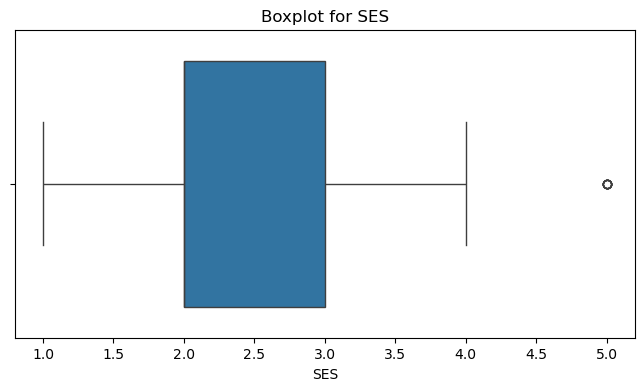

<Figure size 800x400 with 0 Axes>

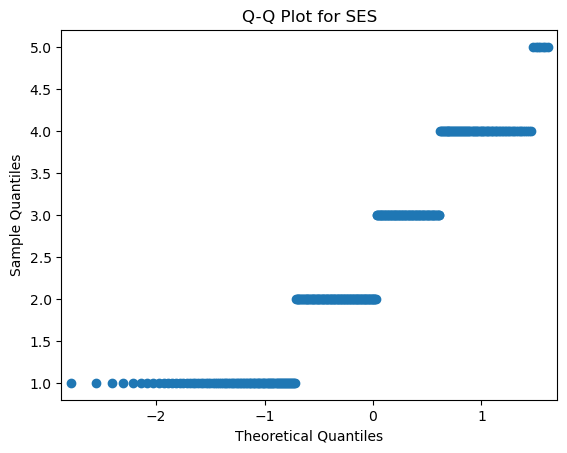

Shapiro-Wilk test for SES:
Statistic: nan, p-value: nan
The data for SES does not appear to be normally distributed.


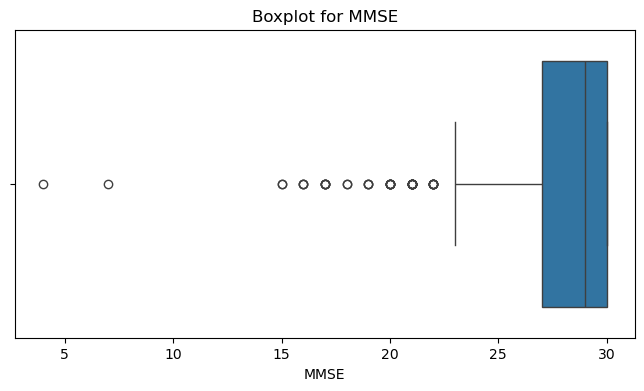

<Figure size 800x400 with 0 Axes>

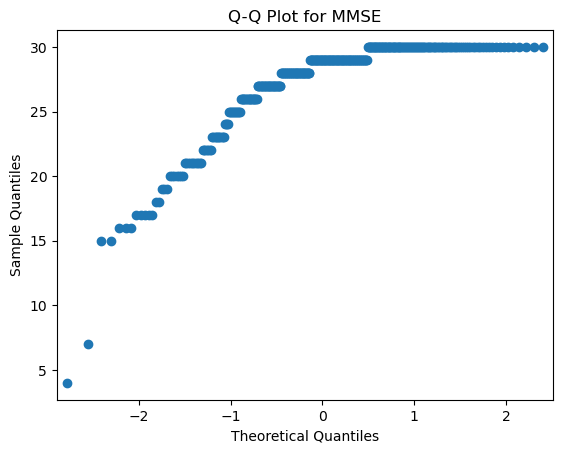

Shapiro-Wilk test for MMSE:
Statistic: nan, p-value: nan
The data for MMSE does not appear to be normally distributed.


In [21]:
# Function to check for outliers using box plots
def check_outliers(data, column_name):
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[column_name])
    plt.title(f'Boxplot for {column_name}')
    plt.show()

# Function to check for normality using Q-Q plot and Shapiro-Wilk test
def check_normality(data, column_name):
    # Q-Q plot
    plt.figure(figsize=(8, 4))
    qqplot(data[column_name], line='s')
    plt.title(f'Q-Q Plot for {column_name}')
    plt.show()
    # Shapiro-Wilk test for normality
    stat, p_value = shapiro(data[column_name])
    print(f'Shapiro-Wilk test for {column_name}:')
    print(f'Statistic: {stat}, p-value: {p_value}')
    if p_value > 0.05:
        print(f'The data for {column_name} appears to be normally distributed.')
    else:
        print(f'The data for {column_name} does not appear to be normally distributed.')

# Example usage for a specific column
column_of_interest = ['SES', 'MMSE']

for col in column_of_interest:
    check_outliers(data, col)
    check_normality(data, col)

In [23]:
# Replace with Mean value
for i in column_of_interest:
    mean = data[i].mean()
    data[i].replace(np.nan, mean, inplace=True)

In [25]:
data.isnull().sum()

Group    0
M/F      0
Age      0
EDUC     0
SES      0
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
dtype: int64

In [27]:
#Group: Target variable indicating the diagnostic group (Demented, Nondemented, Converted).
#M/F: Gender of the individuals (Male/Female).
#Age: Age of the individuals.
#EDUC: Years of education.
#SES: Socioeconomic Status, ranging from 1 (Low) to 5 (High).
#MMSE: Mini Mental State Examination.
#CDR: Clinical Dementia Rating.
#eTIV: Estimated total intracranial volume.
#nWBV: Normalized Whole Brain Volume.
#ASF: Atlas Scaling Factor.

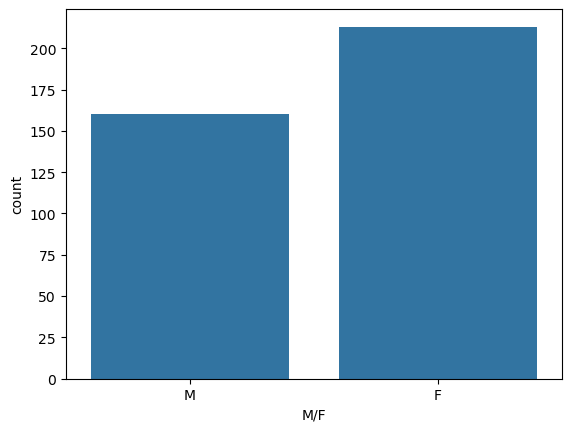

In [27]:
#Visualising target variable
sns.countplot(x='M/F', data=data) #countplot->makes a bar chart from counting, automated graph
plt.show()

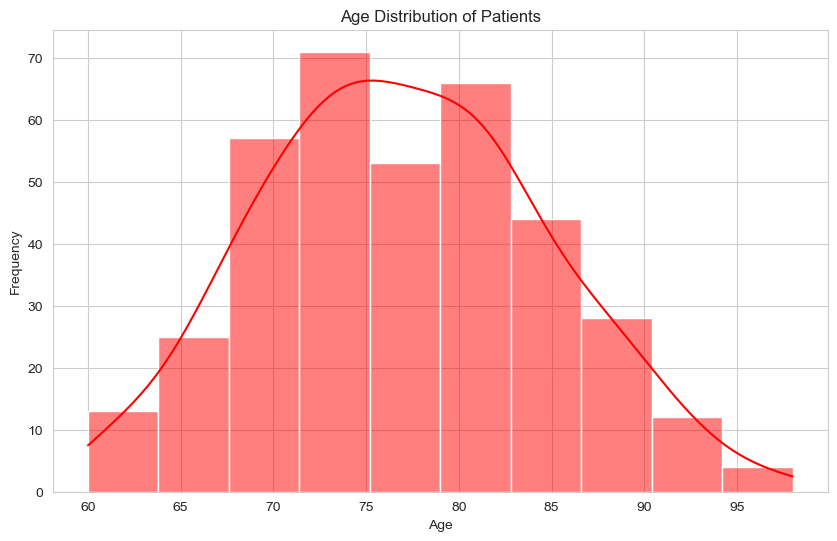

In [31]:
#Visualising the target variable
#set backgroung style of plot
sns.set_style('whitegrid')

#plotting histogram for age
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde = True, color = 'red', bins = 10)
#kde-> kernel density estimation
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


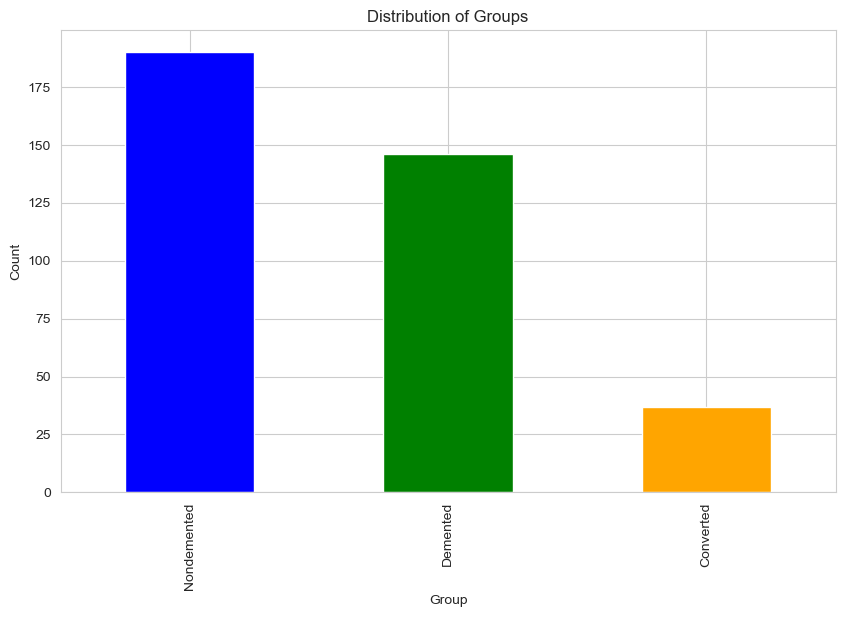

In [39]:
group_counts = data['Group'].value_counts()

# Define colors for each group
colors = ['orange' if group == 'Converted' else 'green' if group == 'Demented' else 'blue' for group in group_counts.index]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
group_counts.plot(kind='bar', color=colors)
plt.title('Distribution of Groups')
plt.xlabel('Group')
plt.ylabel('Count')
plt.show()

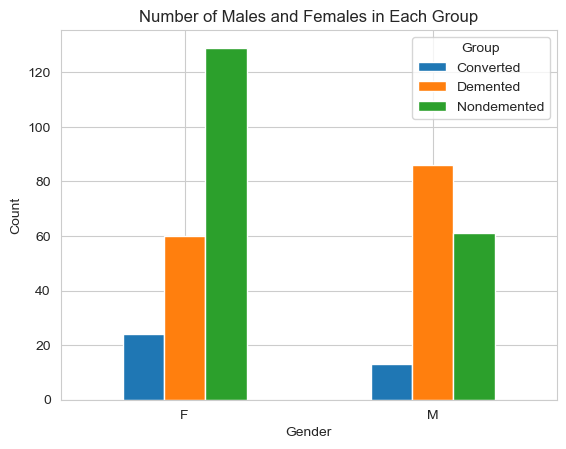

In [33]:
pivot_data = data.pivot_table(index='M/F', columns='Group', aggfunc='size', fill_value=0)

# Plot the histogram with grouped bars
pivot_data.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Number of Males and Females in Each Group')
plt.xticks(rotation=0)
plt.legend(title='Group')
plt.show()

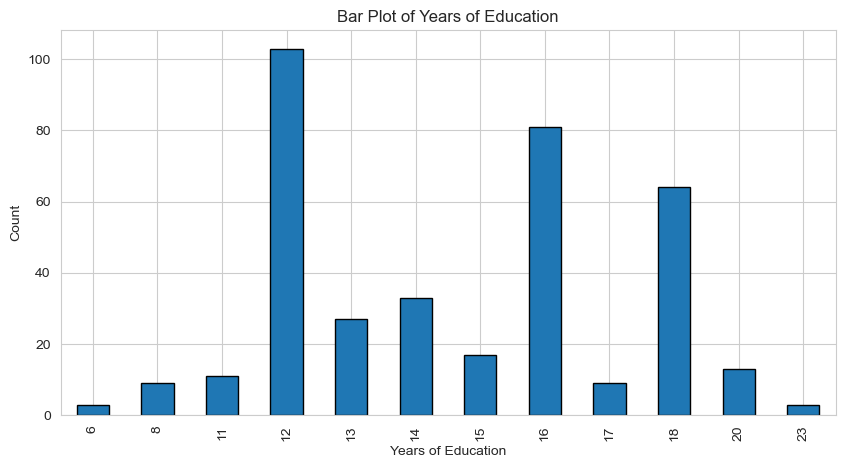

In [43]:
educ_counts = data['EDUC'].value_counts().sort_index()

# Plot the bar plot for EDUC column
plt.figure(figsize=(10, 5))
educ_counts.plot(kind='bar', edgecolor='k')
plt.xlabel('Years of Education')
plt.ylabel('Count')
plt.title('Bar Plot of Years of Education')
plt.show()


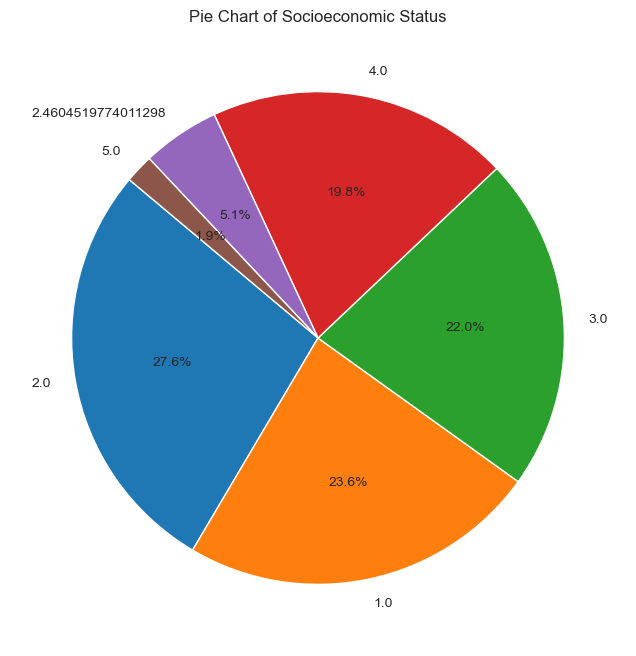

In [35]:
ses_counts = data['SES'].value_counts()

# Plot the pie chart for SES column
plt.figure(figsize=(8, 8))
ses_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.ylabel('')
plt.title('Pie Chart of Socioeconomic Status')
plt.show()

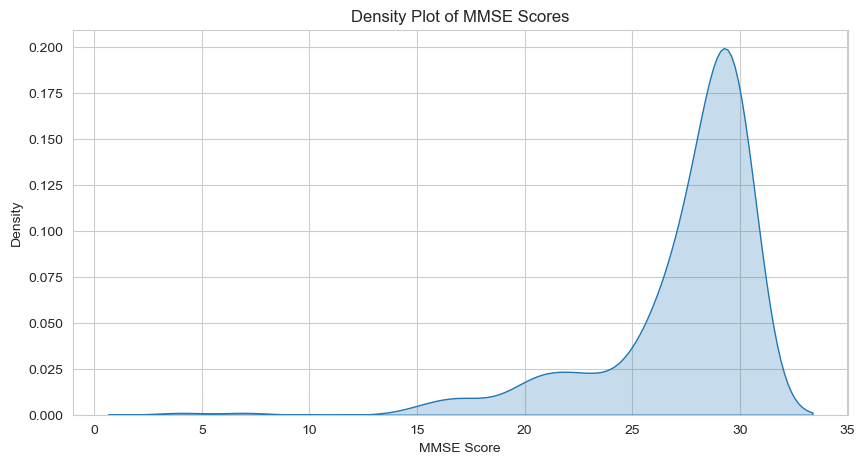

In [37]:
# Density Plot for MMSE column
plt.figure(figsize=(10, 5))
sns.kdeplot(data['MMSE'].dropna(), shade=True)
plt.xlabel('MMSE Score')
plt.ylabel('Density')
plt.title('Density Plot of MMSE Scores')
plt.show()


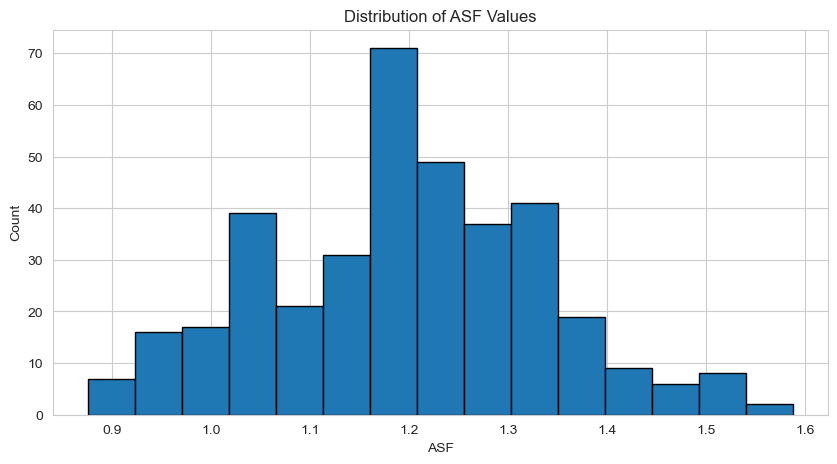

In [39]:
plt.figure(figsize=(10, 5))
plt.hist(data['ASF'].dropna(), bins=15, edgecolor='k')
plt.xlabel('ASF')
plt.ylabel('Count')
plt.title('Distribution of ASF Values')
plt.show()

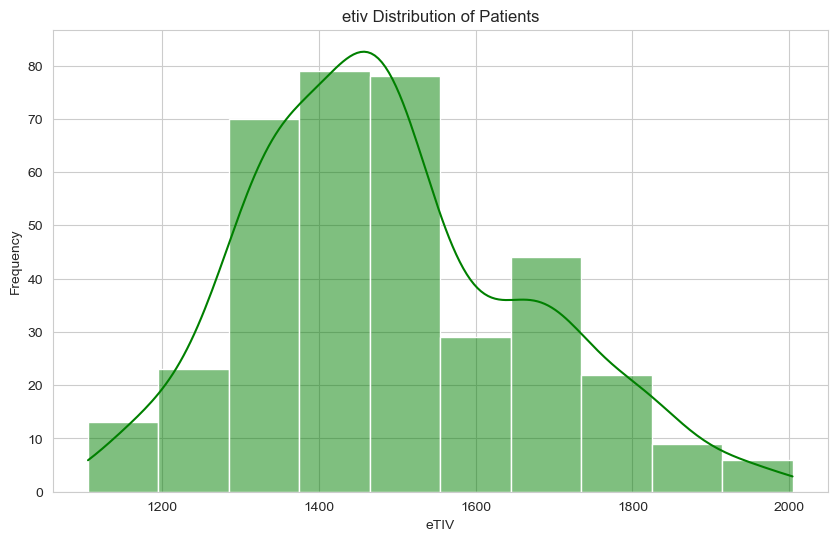

In [41]:
sns.set_style('whitegrid')

#plotting histogram for age
plt.figure(figsize=(10, 6))
sns.histplot(data['eTIV'], kde = True, color = 'green', bins = 10)
#kde-> kernel density estimation
plt.title('etiv Distribution of Patients')
plt.xlabel('eTIV')
plt.ylabel('Frequency')
plt.show()


<Figure size 1000x600 with 0 Axes>

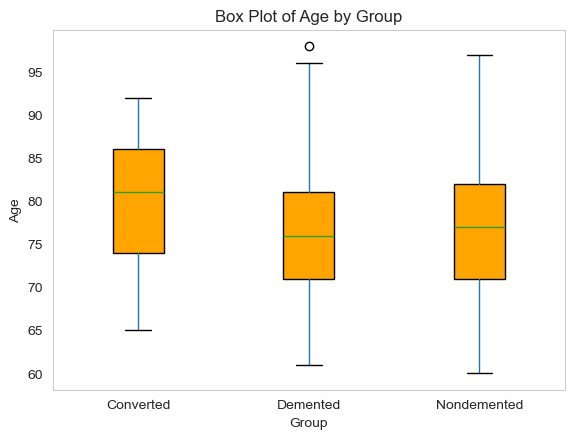

In [43]:
plt.figure(figsize=(10, 6))
data.boxplot(column='Age', by='Group', grid=False, patch_artist=True, boxprops=dict(facecolor='orange', color='black'))

# Adding titles and labels
plt.title('Box Plot of Age by Group')
plt.suptitle('')  # Suppress the automatic title
plt.xlabel('Group')
plt.ylabel('Age')
plt.show()

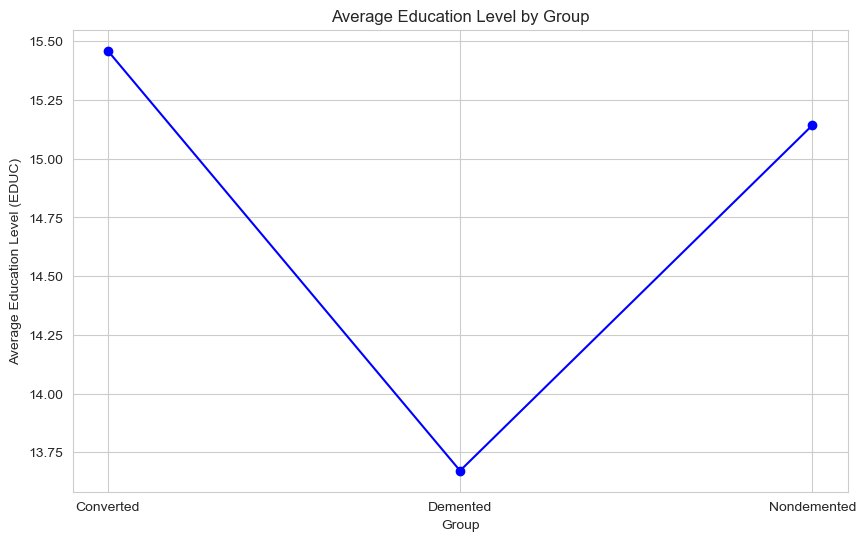

In [45]:
group_education = data.groupby('Group')['EDUC'].mean()

# Plotting a line graph for EDUC vs. Group
plt.figure(figsize=(10, 6))
plt.plot(group_education.index, group_education, marker='o', linestyle='-', color='blue')

# Adding titles and labels
plt.title('Average Education Level by Group')
plt.xlabel('Group')
plt.ylabel('Average Education Level (EDUC)')
plt.grid(True)
plt.show()

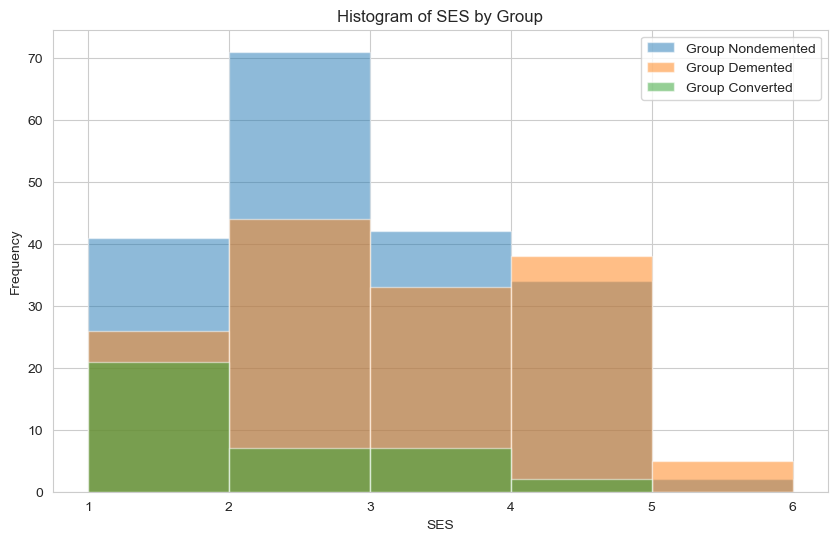

In [47]:
plt.figure(figsize=(10, 6))

# Plotting for each group
groups = data['Group'].unique()
for group in groups:
    subset = data[data['Group'] == group]
    plt.hist(subset['SES'], bins=range(1, 7), alpha=0.5, label=f'Group {group}')

plt.xlabel('SES')
plt.ylabel('Frequency')
plt.title('Histogram of SES by Group')
plt.legend()
plt.grid(True)
plt.show()

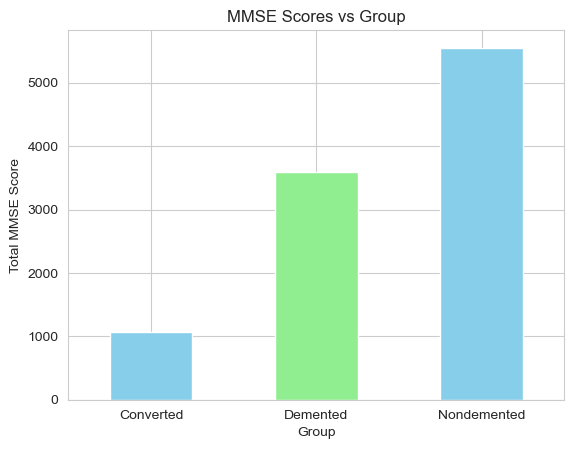

In [49]:
grouped_data = data.groupby('Group')['MMSE'].sum()

# Creating the stacked bar graph
grouped_data.plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen'])

plt.title('MMSE Scores vs Group')
plt.xlabel('Group')
plt.ylabel('Total MMSE Score')
plt.xticks(rotation=0)
plt.show()

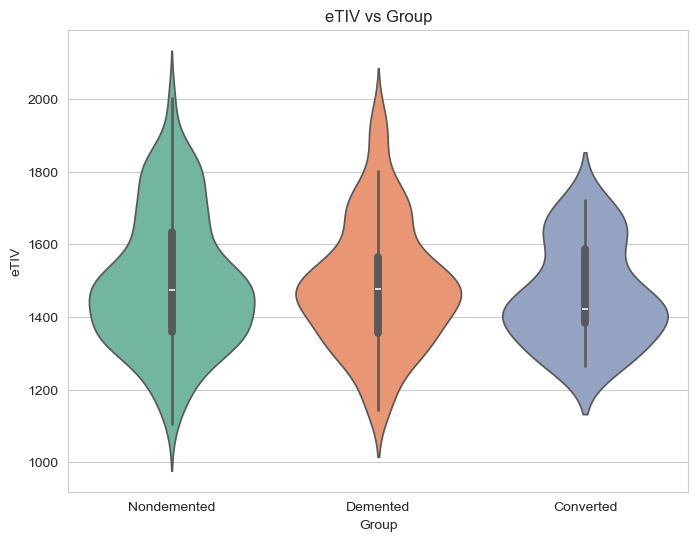

In [51]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Group', y='eTIV', data=data, palette='Set2')

plt.title('eTIV vs Group')
plt.xlabel('Group')
plt.ylabel('eTIV')
plt.show()

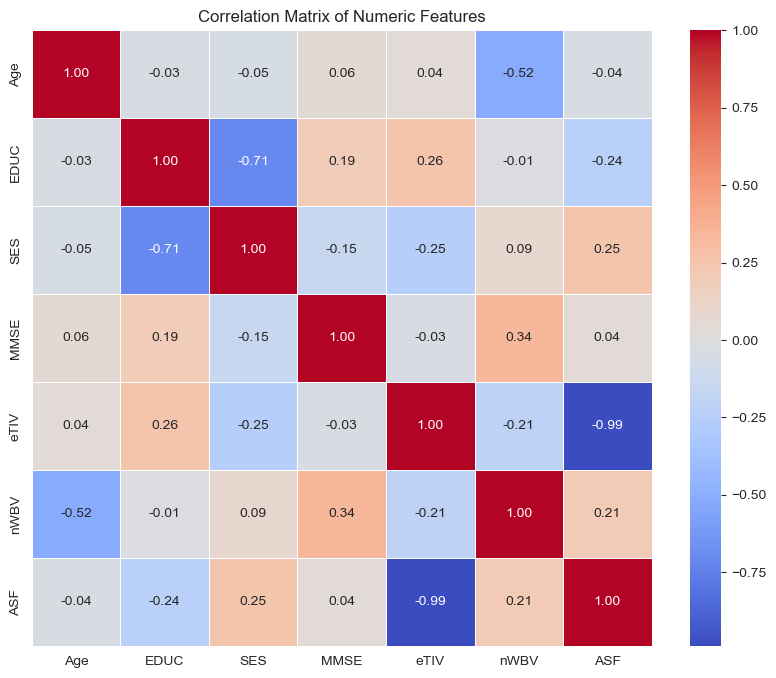

In [53]:
correlation_matrix = data[['Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()


In [55]:
# Outlier treatment using IQR for numeric features
numeric_features = ['Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']

for feature in numeric_features:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Cap outliers
    data[feature] = np.where(data[feature] < lower_bound, lower_bound, data[feature])
    data[feature] = np.where(data[feature] > upper_bound, upper_bound, data[feature])

# Apply logarithmic transformation to 'MMSE' and 'eTIV'
data['MMSE'] = np.log1p(data['MMSE'])

In [57]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to 'Group'
data['Group'] = label_encoder.fit_transform(data['Group'])
data

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,2,M,87.0,14.0,2.000000,3.332205,0.0,1957.0,0.696,0.883
1,2,M,88.0,14.0,2.000000,3.433987,0.0,1957.0,0.681,0.876
2,1,M,75.0,12.0,2.460452,3.178054,0.5,1678.0,0.736,1.046
3,1,M,76.0,12.0,2.460452,3.367296,0.5,1738.0,0.713,1.010
4,1,M,80.0,12.0,2.460452,3.157000,0.5,1698.0,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,1,M,82.0,16.0,1.000000,3.367296,0.5,1693.0,0.694,1.037
369,1,M,86.0,16.0,1.000000,3.295837,0.5,1688.0,0.675,1.040
370,2,F,61.0,13.0,2.000000,3.433987,0.0,1319.0,0.801,1.331
371,2,F,63.0,13.0,2.000000,3.433987,0.0,1327.0,0.796,1.323


In [59]:
# Perform one-hot encoding for 'M/F'
data = pd.get_dummies(data, columns=['M/F'], drop_first=True)
data.sample(5)

,Group,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,M/F_M
196,2,61.0,16.0,1.0,3.433987,0.0,1513.0,0.771,1.160,False
114,0,85.0,18.0,1.0,3.401197,0.0,1264.0,0.701,1.388,False
32,2,86.0,12.0,3.0,3.332205,0.0,1813.0,0.761,0.968,True
14,2,95.0,14.0,2.0,3.401197,0.0,1257.0,0.703,1.396,False
52,1,66.0,18.0,2.0,3.157000,1.0,1562.0,0.717,1.124,True


In [61]:
#input
x = data.iloc[:, :-1].values

#output
y = data.iloc[:, -1].values

In [63]:
x,y

(array([[2.000e+00, 8.700e+01, 1.400e+01, ..., 1.957e+03, 6.960e-01,
         8.830e-01],
        [2.000e+00, 8.800e+01, 1.400e+01, ..., 1.957e+03, 6.810e-01,
         8.760e-01],
        [1.000e+00, 7.500e+01, 1.200e+01, ..., 1.678e+03, 7.360e-01,
         1.046e+00],
        ...,
        [2.000e+00, 6.100e+01, 1.300e+01, ..., 1.319e+03, 8.010e-01,
         1.331e+00],
        [2.000e+00, 6.300e+01, 1.300e+01, ..., 1.327e+03, 7.960e-01,
         1.323e+00],
        [2.000e+00, 6.500e+01, 1.300e+01, ..., 1.333e+03, 8.010e-01,
         1.317e+00]]),
 array([ True,  True,  True,  True,  True, False, False,  True,  True,
         True,  True,  True,  True, False, False,  True,  True, False,
        False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True,  True, False, False, False,
         True,  True,  True,  True,  True, False, False, False, False,
         True,  True, False, False, False, False,  True,  True, False,
        False, Fals

In [65]:
#Feature engineering
#selecting best features using selectkbest
#feature selection

from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif

selector = SelectKBest(f_classif, k=5)
X_new = selector.fit_transform(x,y)
print(X_new)

[[3.33220451e+00 0.00000000e+00 1.95700000e+03 6.96000000e-01
  8.83000000e-01]
 [3.43398720e+00 0.00000000e+00 1.95700000e+03 6.81000000e-01
  8.76000000e-01]
 [3.17805383e+00 5.00000000e-01 1.67800000e+03 7.36000000e-01
  1.04600000e+00]
 ...
 [3.43398720e+00 0.00000000e+00 1.31900000e+03 8.01000000e-01
  1.33100000e+00]
 [3.43398720e+00 0.00000000e+00 1.32700000e+03 7.96000000e-01
  1.32300000e+00]
 [3.43398720e+00 0.00000000e+00 1.33300000e+03 8.01000000e-01
  1.31700000e+00]]


In [67]:
#Feature scaling

scaler = StandardScaler()
scaled_features = scaler.fit_transform(X_new)
scaled_features


array([[-0.24288225, -0.77765291,  2.67542961, -0.90516867, -2.266058  ],
       [ 0.8600042 , -0.77765291,  2.67542961, -1.30964265, -2.31682532],
       [-1.91321232,  0.55905002,  1.08412654,  0.17342861, -1.08390466],
       ...,
       [ 0.8600042 , -0.77765291, -0.96346415,  1.92614919,  0.98305055],
       [ 0.8600042 , -0.77765291, -0.91783539,  1.79132453,  0.92503075],
       [ 0.8600042 , -0.77765291, -0.88361382,  1.92614919,  0.88151591]])

In [69]:
#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y, test_size=0.2, random_state=0)

#Classification algorithms
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [71]:
#Training and evaluating classifiers

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {name}: \n", cm)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f'{name} Accuracy: {accuracy *100:.2f} %')
    print(classification_report(y_test, y_pred))
    print('...............................................')

Confusion Matrix for Logistic Regression: 
 [[39  4]
 [12 20]]
Logistic Regression Accuracy: 78.67 %
              precision    recall  f1-score   support

       False       0.76      0.91      0.83        43
        True       0.83      0.62      0.71        32

    accuracy                           0.79        75
   macro avg       0.80      0.77      0.77        75
weighted avg       0.79      0.79      0.78        75

...............................................
Confusion Matrix for Decision Tree: 
 [[32 11]
 [12 20]]
Decision Tree Accuracy: 69.33 %
              precision    recall  f1-score   support

       False       0.73      0.74      0.74        43
        True       0.65      0.62      0.63        32

    accuracy                           0.69        75
   macro avg       0.69      0.68      0.69        75
weighted avg       0.69      0.69      0.69        75

...............................................
Confusion Matrix for Random Forest: 
 [[34  9]
 [ 8 24]]
Ran

In [73]:
#Finding best classifier
best_classifier = max(results, key=results.get)
print(f'Best Classifier: {best_classifier} with Accuracy: {results[best_classifier]:.4f}')


Best Classifier: Naive Bayes with Accuracy: 0.8000


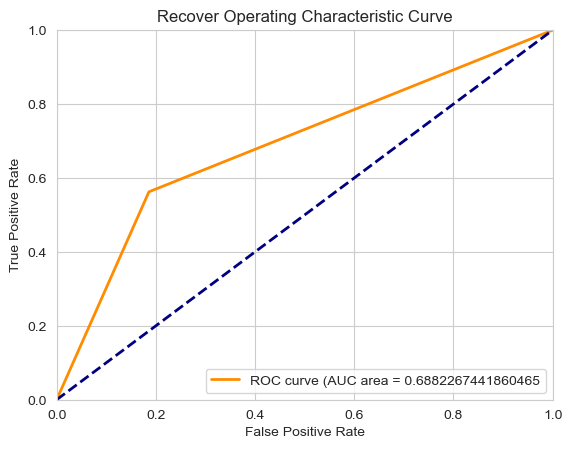

In [75]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr,tpr,thresholds = roc_curve(y_test, y_pred)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC area = {roc_auc}')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Recover Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

In [87]:
#Prediction system
model = GaussianNB()
model.fit(X_train, y_train)

# Building a predictive system
input_data = (80.0,12.0,2.460452,3.157000,0.5)	

# Changing input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Standardize the data using the existing scaler
std_data = scaler.transform(input_data_reshaped)

# Make a prediction using the trained model
prediction = model.predict(std_data)

# Print the result
if prediction[0] == 0:
    print("The person doesn't have Alzheimer's")
else:
    print("The person has Alzheimer's")

The person has Alzheimer's
